# **DATASETS**
Para el desarrollo de este proyecto se cuenta con 8 datasets relacionados a distintos datos o características de los equipos y/o clientes de la empresa.

El objetivo de este notebook es analizar y procesar los datos presentes en cada uno de los datasets para poder unirlos en un dataset general, que será utilizado para crear los modelos de predicción.

In [107]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from custom_functions import *
%matplotlib inline

**SUSCRIPTORA**

Este dataset contiene información sobre los clientes y sus contratos registrados en el sistema de la empresa.

In [108]:
suscriptora = pd.read_csv('01_suscriptora_202201_202204.csv')
suscriptora.head()

,NUMPERIODO,FECINGRESOCLIENTE,nro_documento_hash,nro_telefono_hash,FECACTIVACIONCONTRATO,TIPO_ADQ
0,202201,2011-03-02 00:00:00,5f58359a37ac456d9050c75aa36720b73063bf4b77f483...,9be57e3928a78ae85be270575f97e82a6bdbd59fc87281...,2018-12-07 00:00:00,tipo1
1,202201,2005-08-31 00:00:00,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,119dd6dff66e259a3996de7d885e2c54e8ed5874239346...,2018-12-13 00:00:00,tipo1
2,202201,2005-08-31 00:00:00,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,73cec44593f362cccdb45773197a0bf2136978cb241c91...,2018-12-13 00:00:00,tipo1
3,202201,2005-08-31 00:00:00,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,db86e518af696d60b247466fd1bb5823cf81a9442c16b2...,2018-12-13 00:00:00,tipo2
4,202201,2005-08-31 00:00:00,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,90d5ab1ad28da36b0fa821759b0a9df2b248dc92a557a5...,2018-12-13 00:00:00,tipo1


In [109]:
suscriptora.shape

(734544, 6)

In [110]:
suscriptora.isnull().sum()

NUMPERIODO               0
FECINGRESOCLIENTE        0
nro_documento_hash       0
nro_telefono_hash        0
FECACTIVACIONCONTRATO    0
TIPO_ADQ                 0
dtype: int64

In [111]:
suscriptora['NUMPERIODO'].value_counts().sort_index()

202201    182145
202202    184821
202203    181029
202204    186549
Name: NUMPERIODO, dtype: int64

[]

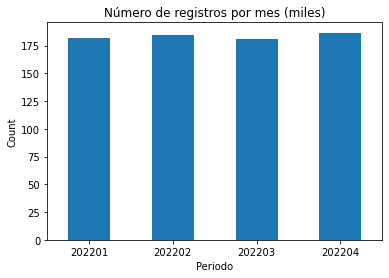

In [112]:
(suscriptora['NUMPERIODO'].value_counts() / 1000).sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('Periodo')
plt.ylabel('Count')
plt.title('Número de registros por mes (miles)')
plt.plot()

In [113]:
print('Nro de telefonos: {}'.format(suscriptora['nro_telefono_hash'].unique().shape[0]))
print('Nro de clientes: {}'.format(suscriptora['nro_documento_hash'].unique().shape[0]))

Nro de telefonos: 216727
Nro de clientes: 62772


In [114]:
suscriptora['FECACTIVACIONCONTRATO'].value_counts().sort_index()

0001-01-01 00:00:00      4
2010-04-22 00:00:00      4
2010-04-29 00:00:00      4
2010-05-19 00:00:00      4
2010-05-31 00:00:00      8
                      ... 
2022-04-26 00:00:00    439
2022-04-27 00:00:00    625
2022-04-28 00:00:00    566
2022-04-29 00:00:00    808
2022-04-30 00:00:00    634
Name: FECACTIVACIONCONTRATO, Length: 3385, dtype: int64

In [115]:
suscriptora['FECINGRESOCLIENTE'].value_counts().sort_index()

0001-01-01 00:00:00    1337
2000-01-01 00:00:00      20
2000-01-07 00:00:00       3
2000-01-17 00:00:00      18
2000-02-02 00:00:00      32
                       ... 
2099-12-10 00:00:00       4
2099-12-22 00:00:00      68
2099-12-27 00:00:00      24
2099-12-29 00:00:00      32
2099-12-30 00:00:00      20
Name: FECINGRESOCLIENTE, Length: 6251, dtype: int64

In [116]:
def date_to_int(df, column, format = "datetime"):

    """Convierte una columna de fechas al número de días desde una fecha mínima

        Args:
            df(DataFrame): Dataframe en el que se convertirá la columna
            column(str): nombre de la columna
            format(str): formato de fecha de los datos de la columna

        Returns:
            new_df(DataFrame): DataFrame con la nueva columna incluida
    """

    new_df = df

    if format == "datetime":
        min_date = '1970-01-01 00:00:00' #minima fecha que se puede convertir a Timestamp
        new_df.loc[new_df[column] < min_date, column] = min_date
    
    new_col = column + "_INT"
    new_df[new_col] = pd.to_datetime(new_df[column]).values.astype(np.int64) // (144 * 1e10)
    
    return new_df

In [117]:
suscriptora2 = date_to_int(suscriptora, 'FECACTIVACIONCONTRATO')
suscriptora2 = date_to_int(suscriptora2, 'FECINGRESOCLIENTE')

In [118]:
suscriptora['TIPO_ADQ'].value_counts()

tipo1    396321
tipo2    338223
Name: TIPO_ADQ, dtype: int64

In [119]:
tipo_adq = pd.get_dummies(suscriptora['TIPO_ADQ'])
suscriptora2 = pd.concat([suscriptora2, tipo_adq], axis = 1)
suscriptora2.drop(['FECINGRESOCLIENTE', 'FECACTIVACIONCONTRATO', 'TIPO_ADQ'], axis = 1, inplace = True)

In [120]:
suscriptora2.head()

,NUMPERIODO,nro_documento_hash,nro_telefono_hash,FECACTIVACIONCONTRATO_INT,FECINGRESOCLIENTE_INT,tipo1,tipo2
0,202201,5f58359a37ac456d9050c75aa36720b73063bf4b77f483...,9be57e3928a78ae85be270575f97e82a6bdbd59fc87281...,1072320.0,902100.0,1,0
1,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,119dd6dff66e259a3996de7d885e2c54e8ed5874239346...,1072680.0,781560.0,1,0
2,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,73cec44593f362cccdb45773197a0bf2136978cb241c91...,1072680.0,781560.0,1,0
3,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,db86e518af696d60b247466fd1bb5823cf81a9442c16b2...,1072680.0,781560.0,0,1
4,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,90d5ab1ad28da36b0fa821759b0a9df2b248dc92a557a5...,1072680.0,781560.0,1,0


* El número de registros en este dataset se utilizará como base para el dataset general.
* No hay registros vacíos en este dataset.
* Los campos *nro_telefono_hash* y *nro_documento_hash* se utilizarán como llaves para realizar la unión con los demás datasets.
* Los campos tipo fecha se convirtieron a valores numéricos y se extrajeron las variables dummy del tipo de adquisición de cada registro para que estas variables puedan ser utilizadas en el modelo predictivo.

In [121]:
dataset_final = suscriptora2

**ADENDA**

Dataset que contiene información relacionada a la adenda de cada equipo.

In [122]:
adenda = pd.read_csv('02_adenda_202201_202204.csv')
adenda.head()

,NUMPERIODO,nro_telefono_hash,VCHMESADENDA,VCHPENALIDAD
0,202201,24f30582242d54d1062a4046da5d9b2e6b82e18a3a5603...,4.4,320.55
1,202201,17a726eb572c88304418c492240d55731bc217e3daaa30...,4.4,25.64
2,202201,1ac958601dc4baae1129ae2a6e8f5c1331d86ae69e4139...,11.7,246.59
3,202201,9fae13304d816838733b6e17bd50572cc66e050ce14081...,5.3,1383.11
4,202201,817e8c7400ffe8d759512f8863932f1ecf2dd759628fb8...,4.3,5.79


In [123]:
adenda.shape

(127293, 4)

In [124]:
adenda.isnull().sum()

NUMPERIODO            0
nro_telefono_hash     0
VCHMESADENDA          0
VCHPENALIDAD         15
dtype: int64

In [125]:
adenda[adenda.isnull().any(axis = 1)].sort_values(by = 'VCHMESADENDA')

,NUMPERIODO,nro_telefono_hash,VCHMESADENDA,VCHPENALIDAD
36083,202201,bd5d21568c4da67ecd96cddf8c62bcf6f9e4a7f25f4989...,2.3,NaN
49866,202202,bd5d21568c4da67ecd96cddf8c62bcf6f9e4a7f25f4989...,3.3,NaN
375,202201,6511b575980d9d1a9eb017d445bf036156b211176d07aa...,3.9,NaN
376,202201,cd579eeec1e49f4958195e36796e988d1d16c394fa0463...,3.9,NaN
94378,202203,bd5d21568c4da67ecd96cddf8c62bcf6f9e4a7f25f4989...,4.0,NaN
55421,202202,6511b575980d9d1a9eb017d445bf036156b211176d07aa...,4.9,NaN
55422,202202,cd579eeec1e49f4958195e36796e988d1d16c394fa0463...,4.9,NaN
609,202201,7b769819b260cd6ffb27bfd25cb9e93bed697095715eae...,53.7,NaN
59414,202202,7b769819b260cd6ffb27bfd25cb9e93bed697095715eae...,54.6,NaN
73995,202203,7b769819b260cd6ffb27bfd25cb9e93bed697095715eae...,55.3,NaN


In [126]:
adenda[adenda['VCHMESADENDA'] < 50].sort_values(by = 'VCHMESADENDA').tail(10)

,NUMPERIODO,nro_telefono_hash,VCHMESADENDA,VCHPENALIDAD
31185,202201,2034d58130761dfa376a7d2779be1d103b042ed2a3b362...,18.3,0.00
53469,202202,c8017bd48e6599c068daf556380ed3597ce5f38d9f1fa9...,18.3,0.00
52028,202202,3b2e0c15fe0b0a38aed65ba81d2ef77d026f0d15ac5c52...,18.3,1.15
2594,202201,c86b1d210cc93e32e2ccc75f74e3ec2fe39c5e91e4c770...,18.3,0.00
35477,202201,828d776eca1ac25ab4728bfbbef3b3b1e7a516e33d062b...,18.3,0.00
50970,202202,0641bb72c6c3e9c18bca37b1c3331fff0ca2525059e682...,18.3,0.00
71905,202202,c33fba119b2b0d20f7528f32559367a779dd77da32a659...,18.3,0.00
47856,202202,4206894a591e2d8d0db23c76b4b954fee5b9821b7c5317...,18.3,0.00
19250,202201,8df3419db746194c224ec3e61c0866078b99dcc5802387...,18.3,2.99
42802,202202,d78271e0b75caf02bcec341ac75d2cb1f8c69823a8f5bc...,18.3,0.00


[]

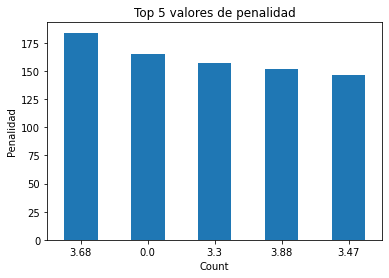

In [127]:
adenda['VCHPENALIDAD'].value_counts().head().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('Count')
plt.ylabel('Penalidad')
plt.title('Top 5 valores de penalidad')
plt.plot()

Existen varios registros que tienen una penalidad de 0, además que la mitad de los registros faltantes corresponden a un mes mayor a 50 (según la tabla los registros con los meses más altos tienen una penalidad practicamente de 0), por lo que los valores faltantes se rellenarán con ceros.

In [128]:
adenda2 = adenda
adenda2['VCHPENALIDAD'] = adenda2['VCHPENALIDAD'].fillna(0)

In [129]:
dataset_final = pd.merge(dataset_final, adenda2, on = ['NUMPERIODO', 'nro_telefono_hash'], how = 'left')

In [130]:
dataset_final.head()

,NUMPERIODO,nro_documento_hash,nro_telefono_hash,FECACTIVACIONCONTRATO_INT,FECINGRESOCLIENTE_INT,tipo1,tipo2,VCHMESADENDA,VCHPENALIDAD
0,202201,5f58359a37ac456d9050c75aa36720b73063bf4b77f483...,9be57e3928a78ae85be270575f97e82a6bdbd59fc87281...,1072320.0,902100.0,1,0,NaN,NaN
1,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,119dd6dff66e259a3996de7d885e2c54e8ed5874239346...,1072680.0,781560.0,1,0,7.6,365.57
2,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,73cec44593f362cccdb45773197a0bf2136978cb241c91...,1072680.0,781560.0,1,0,NaN,NaN
3,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,db86e518af696d60b247466fd1bb5823cf81a9442c16b2...,1072680.0,781560.0,0,1,NaN,NaN
4,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,90d5ab1ad28da36b0fa821759b0a9df2b248dc92a557a5...,1072680.0,781560.0,1,0,NaN,NaN


In [131]:
dataset_final.isnull().sum()

NUMPERIODO                        0
nro_documento_hash                0
nro_telefono_hash                 0
FECACTIVACIONCONTRATO_INT         0
FECINGRESOCLIENTE_INT             0
tipo1                             0
tipo2                             0
VCHMESADENDA                 607251
VCHPENALIDAD                 607251
dtype: int64

Los valores faltantes de adenda y penalidad se completan con 0 ya que los equipos correspondientes no se encuentran en la base de datos *Adenda*.

In [132]:
dataset_final.fillna(0, inplace = True)

**PERFIL DIGITAL**

Dataset que contiene información rekacionada al perfil digital de cada equipo.

In [133]:
perfil = pd.read_csv('03_perfil_digital_202201_202204.csv')
perfil.head()

,nro_telefono_hash,GRUPO,SCORECAT,PERIODO
0,00c4e2339165b15e3f02da620f77bc92196b79435fabdf...,grupo_1|grupo_10|grupo_7|grupo_8|grupo_4|grupo_9,medio,202201
1,00c5815b69bbf2beea264dbfec428dceb5c96026376aa0...,grupo_1|grupo_6|grupo_10|grupo_8,medio,202201
2,00c6442fb6364f090fc6d67e7fea70f5b39ed440fd7e2e...,grupo_1|grupo_6|grupo_10|grupo_8|grupo_9|grupo_11,muy alto,202201
3,00c65e02c415ffa0e868b780d104f8d1ed3e754bf0a634...,grupo_1|grupo_10|grupo_8|grupo_9,medio,202201
4,00c6711e91d80998b1cacfc42499a875ed2b0fc42bfa88...,grupo_8,bajo,202201


In [134]:
perfil['SCORECAT'].value_counts()

medio       287004
muy alto    145292
alto        106404
bajo         79244
Name: SCORECAT, dtype: int64

In [135]:
scorecat = pd.get_dummies(perfil['SCORECAT'])
perfil2 = pd.concat([perfil, scorecat], axis = 1)
perfil2.drop('SCORECAT', axis = 1, inplace = True)

In [136]:
groups_df = perfil2['GRUPO'].str.split('|', expand = True)
groups_df

,0,1,2,3,4,5,6,7,8,9,10
0,grupo_1,grupo_10,grupo_7,grupo_8,grupo_4,grupo_9,None,None,None,None,None
1,grupo_1,grupo_6,grupo_10,grupo_8,None,None,None,None,None,None,None
2,grupo_1,grupo_6,grupo_10,grupo_8,grupo_9,grupo_11,None,None,None,None,None
3,grupo_1,grupo_10,grupo_8,grupo_9,None,None,None,None,None,None,None
4,grupo_8,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
617939,grupo_1,grupo_7,grupo_8,grupo_4,grupo_11,None,None,None,None,None,None
617940,grupo_8,None,None,None,None,None,None,None,None,None,None
617941,grupo_1,grupo_7,grupo_8,grupo_11,None,None,None,None,None,None,None
617942,grupo_1,grupo_7,grupo_8,grupo_4,grupo_9,None,None,None,None,None,None


In [137]:
groups_list = []
for i in range(groups_df.shape[1]):
    groups_list.extend(groups_df[i].unique())

groups_list = list(set(groups_list))
groups_list.remove(None)
print(groups_list)

['grupo_2', 'grupo_1', 'grupo_11', 'grupo_5', 'grupo_9', 'grupo_10', 'grupo_3', 'grupo_7', 'grupo_4', 'grupo_8', 'grupo_6']


In [138]:
groups_df = pd.get_dummies(groups_df)
colnames_groups = groups_df.columns
perfil2['NRO_GRUPOS'] = np.zeros(perfil2.shape[0])

for group in groups_list:
    perfil2[group] = np.zeros(perfil2.shape[0])
    
    for col in colnames_groups:
        if col.endswith(group):
            perfil2[group] = perfil2[group] + groups_df[col]

    perfil2['NRO_GRUPOS'] = perfil2['NRO_GRUPOS'] + perfil2[group]

In [139]:
perfil2.drop('GRUPO', axis = 1, inplace = True)
perfil2.rename(columns = {'PERIODO': 'NUMPERIODO'}, inplace = True)

In [140]:
perfil2.head()

,nro_telefono_hash,NUMPERIODO,alto,bajo,medio,muy alto,NRO_GRUPOS,grupo_2,grupo_1,grupo_11,grupo_5,grupo_9,grupo_10,grupo_3,grupo_7,grupo_4,grupo_8,grupo_6
0,00c4e2339165b15e3f02da620f77bc92196b79435fabdf...,202201,0,0,1,0,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,00c5815b69bbf2beea264dbfec428dceb5c96026376aa0...,202201,0,0,1,0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,00c6442fb6364f090fc6d67e7fea70f5b39ed440fd7e2e...,202201,0,0,0,1,6.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,00c65e02c415ffa0e868b780d104f8d1ed3e754bf0a634...,202201,0,0,1,0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,00c6711e91d80998b1cacfc42499a875ed2b0fc42bfa88...,202201,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [141]:
dataset_final = pd.merge(dataset_final, perfil2, on = ['NUMPERIODO', 'nro_telefono_hash'], how = 'left')

In [142]:
dataset_final.head()

,NUMPERIODO,nro_documento_hash,nro_telefono_hash,FECACTIVACIONCONTRATO_INT,FECINGRESOCLIENTE_INT,tipo1,tipo2,VCHMESADENDA,VCHPENALIDAD,alto,...,grupo_1,grupo_11,grupo_5,grupo_9,grupo_10,grupo_3,grupo_7,grupo_4,grupo_8,grupo_6
0,202201,5f58359a37ac456d9050c75aa36720b73063bf4b77f483...,9be57e3928a78ae85be270575f97e82a6bdbd59fc87281...,1072320.0,902100.0,1,0,0.0,0.00,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,119dd6dff66e259a3996de7d885e2c54e8ed5874239346...,1072680.0,781560.0,1,0,7.6,365.57,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,73cec44593f362cccdb45773197a0bf2136978cb241c91...,1072680.0,781560.0,1,0,0.0,0.00,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,db86e518af696d60b247466fd1bb5823cf81a9442c16b2...,1072680.0,781560.0,0,1,0.0,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,90d5ab1ad28da36b0fa821759b0a9df2b248dc92a557a5...,1072680.0,781560.0,1,0,0.0,0.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [143]:
dataset_final.iloc[:, 9:].isnull().sum()

alto          116601
bajo          116601
medio         116601
muy alto      116601
NRO_GRUPOS    116601
grupo_2       116601
grupo_1       116601
grupo_11      116601
grupo_5       116601
grupo_9       116601
grupo_10      116601
grupo_3       116601
grupo_7       116601
grupo_4       116601
grupo_8       116601
grupo_6       116601
dtype: int64

In [144]:
dataset_final.fillna(0, inplace = True)

**ROAMING**

Dataset que contiene información de los servicios utilizados por cada equipo en los distintos periodos.

In [145]:
roaming = pd.read_csv('04_roaming_202201_202204.csv')
roaming.head()

,PERIODO,nro_telefono_hash,MINUTOS,GIGAS,MENSAJES,TIPOSERVICIO,FECHATRAFICO
0,202201,9951e14bf3b8f742a0553636c1fb4a1fcc0c5b47766c3b...,NaN,0.000002,NaN,TIPO1,13/01/2022
1,202201,f8e449f78f5d27d7638df2eed41ae2fe0166f751ff630b...,NaN,0.000964,NaN,TIPO1,30/01/2022
2,202201,f8e449f78f5d27d7638df2eed41ae2fe0166f751ff630b...,NaN,0.000792,NaN,TIPO1,31/01/2022
3,202201,f8e449f78f5d27d7638df2eed41ae2fe0166f751ff630b...,NaN,0.000900,NaN,TIPO1,28/01/2022
4,202201,f8e449f78f5d27d7638df2eed41ae2fe0166f751ff630b...,NaN,0.001230,NaN,TIPO1,29/01/2022


In [146]:
roaming.fillna(0, inplace = True)

In [147]:
roaming['TIPOSERVICIO'].value_counts()

TIPO1    105681
TIPO2     67702
TIPO3      1179
Name: TIPOSERVICIO, dtype: int64

In [148]:
roaming['FECHATRAFICO'].str.split('/', expand = True).sort_values(by = [2,1,0])

,0,1,2
20764,03,12,2021
2409,12,12,2021
2771,12,12,2021
2906,12,12,2021
3594,12,12,2021
...,...,...,...
174421,30,04,2022
174458,30,04,2022
174469,30,04,2022
174528,30,04,2022


Vemos que las fechas de tráfico varian dentro de un rango de 5 meses.

In [149]:
roaming_groups = roaming.groupby(['PERIODO', 'nro_telefono_hash', 'TIPOSERVICIO'], as_index = False)
roaming_groups.sum()

,PERIODO,nro_telefono_hash,TIPOSERVICIO,MINUTOS,GIGAS,MENSAJES
0,202201,001075adeb36447eedbf425659e22834d32c8d45556801...,TIPO2,0.0,0.000000,0.0
1,202201,001a20b049db215ad05dafd7f04ad95309beee87f4fe7a...,TIPO1,0.0,0.015245,0.0
2,202201,001a20b049db215ad05dafd7f04ad95309beee87f4fe7a...,TIPO2,0.0,0.000000,0.0
3,202201,0021b92a805ca9846f4849629ea6d3c71750f9f52eb983...,TIPO1,0.0,2.018947,0.0
4,202201,0021b92a805ca9846f4849629ea6d3c71750f9f52eb983...,TIPO2,0.0,0.000000,0.0
...,...,...,...,...,...,...
24161,202204,ffb983d02acb56b5dab5f52a05513838481978007b93ec...,TIPO2,0.0,0.000000,0.0
24162,202204,ffdbc9bdab23e5993c4bc239e1bde39b5c9236004d2d0a...,TIPO1,0.0,1.311950,0.0
24163,202204,ffdbc9bdab23e5993c4bc239e1bde39b5c9236004d2d0a...,TIPO2,0.0,0.000000,0.0
24164,202204,fffa093bd682cbbbe633fa246e11bff828f34608b974f5...,TIPO1,0.0,0.010179,0.0


In [150]:
tipos = roaming['TIPOSERVICIO'].unique()
tipos

array(['TIPO1', 'TIPO2', 'TIPO3'], dtype=object)

In [151]:
roaming2 = pd.DataFrame()

for tipo in tipos:
    df_sum = roaming_groups.sum()
    df_sum = df_sum.loc[df_sum['TIPOSERVICIO'] == tipo, :]
    df_sum.rename(columns = {'MENSAJES': 'MENSAJES' + tipo[-1],
                            'GIGAS': 'GIGAS' + tipo[-1],
                            'MINUTOS': 'MINUTOS' + tipo[-1]}, inplace = True)

    df_sum.drop('TIPOSERVICIO', axis = 1, inplace = True)

    if tipo == tipos[0]:
        roaming2 = df_sum
    else:
        roaming2 = pd.merge(roaming2, df_sum, on = ['PERIODO', 'nro_telefono_hash'], how = 'outer')

roaming2.fillna(0, inplace = True)

In [152]:
roaming2.rename(columns = {'PERIODO': 'NUMPERIODO'}, inplace = True)

In [153]:
roaming2.head()

,NUMPERIODO,nro_telefono_hash,MINUTOS1,GIGAS1,MENSAJES1,MINUTOS2,GIGAS2,MENSAJES2,MINUTOS3,GIGAS3,MENSAJES3
0,202201,001a20b049db215ad05dafd7f04ad95309beee87f4fe7a...,0.0,0.015245,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,202201,0021b92a805ca9846f4849629ea6d3c71750f9f52eb983...,0.0,2.018947,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,202201,00441d97bc4752f28c52562ac162d7f20be0148ba42968...,0.0,1.196538,0.0,7.316667,0.0,0.0,0.0,0.0,0.0
3,202201,007280bbbb3e1542390a9e08acc5049a4284ba7292109d...,0.0,0.007690,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,202201,0072a67b3bf4e8d59ec2f708f9e171a0f0440952b3f29a...,0.0,1.096050,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [154]:
dataset_final = pd.merge(dataset_final, roaming2, on = ['NUMPERIODO', 'nro_telefono_hash'], how = 'left')

Además crearemos columnas para registrar los minutos, mensajes y gigas utilizados en todos los tipos de servicio por cada equipo.

In [155]:
dataset_final['MINUTOS_TOTAL'] = dataset_final['MINUTOS1'] + dataset_final['MINUTOS2'] + dataset_final['MINUTOS3']
dataset_final['MENSAJES_TOTAL'] = dataset_final['MENSAJES1'] + dataset_final['MENSAJES2'] + dataset_final['MENSAJES3']
dataset_final['GIGAS_TOTAL'] = dataset_final['GIGAS1'] + dataset_final['GIGAS2'] + dataset_final['GIGAS3']

In [156]:
dataset_final.head()

,NUMPERIODO,nro_documento_hash,nro_telefono_hash,FECACTIVACIONCONTRATO_INT,FECINGRESOCLIENTE_INT,tipo1,tipo2,VCHMESADENDA,VCHPENALIDAD,alto,...,MENSAJES1,MINUTOS2,GIGAS2,MENSAJES2,MINUTOS3,GIGAS3,MENSAJES3,MINUTOS_TOTAL,MENSAJES_TOTAL,GIGAS_TOTAL
0,202201,5f58359a37ac456d9050c75aa36720b73063bf4b77f483...,9be57e3928a78ae85be270575f97e82a6bdbd59fc87281...,1072320.0,902100.0,1,0,0.0,0.00,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,119dd6dff66e259a3996de7d885e2c54e8ed5874239346...,1072680.0,781560.0,1,0,7.6,365.57,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,73cec44593f362cccdb45773197a0bf2136978cb241c91...,1072680.0,781560.0,1,0,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,db86e518af696d60b247466fd1bb5823cf81a9442c16b2...,1072680.0,781560.0,0,1,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,90d5ab1ad28da36b0fa821759b0a9df2b248dc92a557a5...,1072680.0,781560.0,1,0,0.0,0.00,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
dataset_final.iloc[:, 25:].isnull().sum()

MINUTOS1          717805
GIGAS1            717805
MENSAJES1         717805
MINUTOS2          717805
GIGAS2            717805
MENSAJES2         717805
MINUTOS3          717805
GIGAS3            717805
MENSAJES3         717805
MINUTOS_TOTAL     717805
MENSAJES_TOTAL    717805
GIGAS_TOTAL       717805
dtype: int64

In [158]:
dataset_final.fillna(0, inplace = True)

**TERMINALES**

Dataset con información correspondiente a las especificaciones de cada equipo

In [159]:
terminales = pd.read_csv('05_terminales_202201_202204.csv')
terminales.head()

,PERIODO,nro_telefono_hash,MARCA,MODELO,NUEVA_GAMMA,LANZAMIENTO,OS,DEVICE_TYPE
0,202201,3038cb30ca012f56def932df8288eea082ab3ae86571b4...,55562347f437d65829303cf6307e71acf8b84a020989dd...,3f302014219b995e2ea726ffcd4de7253f77954cc71a11...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,2019-08-27,1bde98c0df50d2e6aa7f88be84a65da1c7d6a285626385...,SMARTPHONE
1,202201,60ebda703fd786068451fc68c4f896e1dbefba0c431a5d...,2fa558397b58d443dddd1352c5046009968f6b7ad59fca...,120785b6f1a729a705e45fa53be27ca53b88619ef137cf...,f793de205ead5ac302c4a1627829dea41f176b1068b993...,2018-02-01,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE
2,202201,3eeb9a7ec802185cea50cfcac1fd0d8edafc0a1598721c...,d4c6a5785b57062229039a79c714d3cb3a4dac4e3e63ef...,d7f86146eff275ec69aa3de3aaa7d951bcb0667c186ed3...,8563abec343968034b0624650aed7254081e9e39e6b32e...,2019-03-29,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE
3,202201,6e0be6c2dfead876db8d48c3d19b16e5be113cf9060eb6...,2a1022b922f5038bc5bff79ff2960cd12cf266647b4f59...,c2f4db3d203ec9b620e12ca3e8dd689db22c109d349ba1...,de88c121a82a06352bf1aaceba20578356408a334ba046...,2017-06-20,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE
4,202201,f51170e691c700083a162ebea68712351bce1da6163e26...,2fa558397b58d443dddd1352c5046009968f6b7ad59fca...,582969a27a84f2b65970db6cb1907706e6518405ced187...,76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435...,2019-08-06,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE


In [160]:
terminales.isnull().sum()

PERIODO                  0
nro_telefono_hash        0
MARCA                    0
MODELO                   0
NUEVA_GAMMA              0
LANZAMIENTO          72917
OS                       0
DEVICE_TYPE          72953
dtype: int64

In [161]:
terminales['MARCA'].value_counts()

2a1022b922f5038bc5bff79ff2960cd12cf266647b4f59121997a75c710b5b5d    194459
f01640a07b4c0521a49c0ec0a8915832798f19533aecdacb7dba51d8aeb2bbc5     88073
55562347f437d65829303cf6307e71acf8b84a020989dd218f31586eeafd01a9     85201
d4c6a5785b57062229039a79c714d3cb3a4dac4e3e63ef38ab31342b0c69f72c     78213
dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758e8014a24c7fa039e91     72953
                                                                     ...  
b30777e077a476fc51fc9e3754b29b8500c03aafee6aa8ab4721a73c767c12ca         1
ebc79ae5811aa0806b3528a9c4083457621867c0f59cd95d8e6b6fb4cd5ba155         1
3ac55ee9c4398aa925bdc7e3ca0949659d3282be198df7838509e940d869aeeb         1
0cd74626ab1e88dabaa32391f6982dcf6e03001252b6cb649a113bea9756b6f2         1
47d1df45870c097c885a95e08ee961fbde756662f117905a9edb78d7a285d58c         1
Name: MARCA, Length: 341, dtype: int64

In [162]:
terminales['MODELO'].value_counts()

dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758e8014a24c7fa039e91    72916
c8f81211f4fd423797d2a61e3ae1ca32853fc979cc355236039abbba5a15fc3b    19469
182b798959e66ad76aad092ee2199146d3ef281b7ec7b3f8807faf15adb1d19c    17224
a64083fa5808c3169cd008d3c5dda4f2a707f0234fd1516cb5b4117e9b638c7e    13110
f62c0463a971774b09a36a703590df43dcebd261d0da8fedd05b92c017004a35    12674
                                                                    ...  
66dac8ab897dd9bb4cc1259c858941c821bd6250f50910f33c271a49a10ffd31        1
f9556fc8734b8b181331b231c6eea582baa5c220b218221c1017ccbcf196de08        1
9b202ecbc6d45c6d8901d989a918878397a3eb9d00e8f48022fc051b19d21a1d        1
ac31ae39ad028a6e3acd2d19552efeee6dcd90015611e777ba667e18606dd51d        1
d519af27049f44b06486bff0d20fffcabe2b5223d9565f457d945dcc7bb46b4b        1
Name: MODELO, Length: 3112, dtype: int64

In [163]:
terminales['NUEVA_GAMMA'].value_counts()

dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758e8014a24c7fa039e91    425835
76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435892b1ab5713e57d470    117506
c4ebc6d4a5832cd9415f906ad03661110c705a72381c8b8b145761d02e2dd23a     44722
f793de205ead5ac302c4a1627829dea41f176b1068b993a32373fc869918374b     24307
de88c121a82a06352bf1aaceba20578356408a334ba046a1084d4e50da923c5e     20559
8563abec343968034b0624650aed7254081e9e39e6b32ed45171fe31f6b7ee59     15007
8e588cd187741f1cd76f5fab77b7208782a8c21d764ce7d7a4cf3ac4e0968873     10250
Name: NUEVA_GAMMA, dtype: int64

Vemos que existen solo 7 gammas, por lo que crearemos variables dummy para esta categoría.

In [164]:
gammas = [('gamma_' + str(i+1)) for i in range(7)]
gammas

['gamma_1', 'gamma_2', 'gamma_3', 'gamma_4', 'gamma_5', 'gamma_6', 'gamma_7']

In [165]:
df_gammas = pd.get_dummies(terminales['NUEVA_GAMMA'])
df_gammas.columns = gammas
df_gammas.head()

,gamma_1,gamma_2,gamma_3,gamma_4,gamma_5,gamma_6,gamma_7
0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0


In [166]:
terminales['DEVICE_TYPE'].value_counts()

SMARTPHONE                    573158
MOBILE PHONE/FEATURE PHONE      5889
HANDHELD                        2329
TABLET                          1370
WLAN ROUTER                     1047
MODEM                            825
DONGLE                           161
MODULE                           152
IOT DEVICE                       144
PORTABLE(INCLUDE PDA)             97
CONNECTED COMPUTER                31
WEARABLE                          27
VEHICLE                            3
Name: DEVICE_TYPE, dtype: int64

Cerca del 90% de equipos son Smartphones, por lo que se agruparan los equipos en Smartphones y en otros modelos en lugar de utilizar todos los tipos existentes.

In [167]:
terminales['SMARTPHONE'] = (terminales['DEVICE_TYPE'] == 'SMARTPHONE').astype(int)

In [168]:
terminales2 = pd.concat([terminales, df_gammas], axis = 1)
terminales2.drop(['NUEVA_GAMMA', 'DEVICE_TYPE'], axis = 1, inplace = True)
terminales2.rename(columns = {'PERIODO': 'NUMPERIODO'}, inplace = True)

In [169]:
terminales2.head()

,NUMPERIODO,nro_telefono_hash,MARCA,MODELO,LANZAMIENTO,OS,SMARTPHONE,gamma_1,gamma_2,gamma_3,gamma_4,gamma_5,gamma_6,gamma_7
0,202201,3038cb30ca012f56def932df8288eea082ab3ae86571b4...,55562347f437d65829303cf6307e71acf8b84a020989dd...,3f302014219b995e2ea726ffcd4de7253f77954cc71a11...,2019-08-27,1bde98c0df50d2e6aa7f88be84a65da1c7d6a285626385...,1,0,0,0,0,1,0,0
1,202201,60ebda703fd786068451fc68c4f896e1dbefba0c431a5d...,2fa558397b58d443dddd1352c5046009968f6b7ad59fca...,120785b6f1a729a705e45fa53be27ca53b88619ef137cf...,2018-02-01,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,1,0,0,0,0,0,0,1
2,202201,3eeb9a7ec802185cea50cfcac1fd0d8edafc0a1598721c...,d4c6a5785b57062229039a79c714d3cb3a4dac4e3e63ef...,d7f86146eff275ec69aa3de3aaa7d951bcb0667c186ed3...,2019-03-29,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,1,0,1,0,0,0,0,0
3,202201,6e0be6c2dfead876db8d48c3d19b16e5be113cf9060eb6...,2a1022b922f5038bc5bff79ff2960cd12cf266647b4f59...,c2f4db3d203ec9b620e12ca3e8dd689db22c109d349ba1...,2017-06-20,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,1,0,0,0,0,0,1,0
4,202201,f51170e691c700083a162ebea68712351bce1da6163e26...,2fa558397b58d443dddd1352c5046009968f6b7ad59fca...,582969a27a84f2b65970db6cb1907706e6518405ced187...,2019-08-06,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,1,1,0,0,0,0,0,0


In [170]:
dataset_final = pd.merge(dataset_final, terminales2, on = ['NUMPERIODO', 'nro_telefono_hash'], how = 'left')

In [171]:
dataset_final.head()

,NUMPERIODO,nro_documento_hash,nro_telefono_hash,FECACTIVACIONCONTRATO_INT,FECINGRESOCLIENTE_INT,tipo1,tipo2,VCHMESADENDA,VCHPENALIDAD,alto,...,LANZAMIENTO,OS,SMARTPHONE,gamma_1,gamma_2,gamma_3,gamma_4,gamma_5,gamma_6,gamma_7
0,202201,5f58359a37ac456d9050c75aa36720b73063bf4b77f483...,9be57e3928a78ae85be270575f97e82a6bdbd59fc87281...,1072320.0,902100.0,1,0,0.0,0.00,1.0,...,2021-05-26,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,119dd6dff66e259a3996de7d885e2c54e8ed5874239346...,1072680.0,781560.0,1,0,7.6,365.57,1.0,...,2017-09-13,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,73cec44593f362cccdb45773197a0bf2136978cb241c91...,1072680.0,781560.0,1,0,0.0,0.00,0.0,...,2020-01-22,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,db86e518af696d60b247466fd1bb5823cf81a9442c16b2...,1072680.0,781560.0,0,1,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,90d5ab1ad28da36b0fa821759b0a9df2b248dc92a557a5...,1072680.0,781560.0,1,0,0.0,0.00,1.0,...,NaN,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [172]:
dataset_final.iloc[:, 37:].isnull().sum()

MARCA           76359
MODELO          76359
LANZAMIENTO    149276
OS              76359
SMARTPHONE      76359
gamma_1         76359
gamma_2         76359
gamma_3         76359
gamma_4         76359
gamma_5         76359
gamma_6         76359
gamma_7         76359
dtype: int64

Los valores faltantes de las marcas, modelos y OS se completarán con los más comunes, en las fechas de lanzamiento se utilizarán la fecha media, y los demás campos se completarán con 0.

In [173]:
# Completar con 0's
dataset_final.iloc[:, 39:] = dataset_final.iloc[:, 39:].fillna(0)

# Completar con las marcas, modelos y sistemas operativos más comunes
dataset_final['MARCA'].fillna(dataset_final['MARCA'].value_counts().idxmax(), inplace = True)
dataset_final['MODELO'].fillna(dataset_final['MODELO'].value_counts().idxmax(), inplace = True)
dataset_final['OS'].fillna(dataset_final['OS'].value_counts().idxmax(), inplace = True)

# Completar con la fecha media
mask = dataset_final['LANZAMIENTO'].notnull()
mean_date = np.mean(pd.to_datetime(dataset_final.loc[mask, 'LANZAMIENTO']).values.astype(np.int64) // 1e9)
dataset_final['LANZAMIENTO'].fillna(dt.datetime.fromtimestamp(mean_date).date(), inplace = True)

In [174]:
dataset_final = date_to_int(dataset_final, 'LANZAMIENTO', 'date')
dataset_final.drop('LANZAMIENTO', axis = 1, inplace = True)

**TRAFICO**

Dataset con registros relacionados al tiempo de uso de apps por cada equipo.

In [175]:
trafico = pd.read_csv('06_trafico_202201_202204.csv')
trafico.head()

,NUMPERIODO,nro_telefono_hash,mins_flujo_1,mins_flujo_2,trafico_app_1,trafico_app_2,trafico_app_3,trafico_app_4,trafico_app_5,trafico_app_6,trafico_app_7,trafico_app_8,trafico_app_9,trafico_total
0,202204,5b0c5d0da8e6cd810368a45fab96877a3833ca0bd1fe73...,195.800000,227.100000,422.145475,1159.640924,0.0,0.0,2.397596,0.0,0.787141,3810.701443,0.0,23330.690439
1,202204,0f9db13f4c372427a46d5d21a8537ea7d7fa0b869d90a5...,203.683333,520.266667,1141.345790,2297.254855,0.0,0.0,0.000000,0.0,4.754853,678.407279,0.0,44099.274686
2,202204,6e8a9477c95e15c45399db6947e696f259bc06e89fd509...,168.633333,279.066667,1264.497999,1987.489417,0.0,0.0,0.000000,0.0,5.851426,309.700850,0.0,14130.016578
3,202204,14a8384dea6b6472e7ee8e93670e132bc10f5edbe15cb0...,268.266667,249.883333,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,5595.667060
4,202204,35b26d6eccc367b986ccc30779b65578766da8f5f4871f...,263.216667,260.750000,0.000000,67.969254,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,23031.092723


In [176]:
trafico.groupby('NUMPERIODO').mean()

,mins_flujo_1,mins_flujo_2,trafico_app_1,trafico_app_2,trafico_app_3,trafico_app_4,trafico_app_5,trafico_app_6,trafico_app_7,trafico_app_8,trafico_app_9,trafico_total
NUMPERIODO,,,,,,,,,,,,
202201,289.303524,374.277647,223.729930,813.467647,93.385189,0.738839,0.146267,0.543444,26.843018,189.971501,63.075037,10768.053602
202202,258.017061,326.659467,199.453528,742.594785,93.844724,0.411241,0.094218,0.789941,23.644354,178.466581,53.408261,9851.535883
202203,292.340403,361.033926,203.463188,799.996758,109.105241,0.414983,0.088577,0.949844,25.149108,193.455950,68.066130,10861.811975
202204,255.822630,319.999728,157.943109,647.900487,85.351045,0.355119,0.113299,0.775792,19.968096,150.872171,66.449049,9015.837882


In [177]:
dataset_final = pd.merge(dataset_final, trafico, on = ['NUMPERIODO', 'nro_telefono_hash'], how = 'left')

In [178]:
dataset_final.head()

,NUMPERIODO,nro_documento_hash,nro_telefono_hash,FECACTIVACIONCONTRATO_INT,FECINGRESOCLIENTE_INT,tipo1,tipo2,VCHMESADENDA,VCHPENALIDAD,alto,...,trafico_app_1,trafico_app_2,trafico_app_3,trafico_app_4,trafico_app_5,trafico_app_6,trafico_app_7,trafico_app_8,trafico_app_9,trafico_total
0,202201,5f58359a37ac456d9050c75aa36720b73063bf4b77f483...,9be57e3928a78ae85be270575f97e82a6bdbd59fc87281...,1072320.0,902100.0,1,0,0.0,0.00,1.0,...,0.362702,1491.756171,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,16606.140346
1,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,119dd6dff66e259a3996de7d885e2c54e8ed5874239346...,1072680.0,781560.0,1,0,7.6,365.57,1.0,...,116.006533,411.665270,0.0,0.0,0.0,0.0,0.029129,180.536775,0.0,3705.222886
2,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,73cec44593f362cccdb45773197a0bf2136978cb241c91...,1072680.0,781560.0,1,0,0.0,0.00,0.0,...,74.277843,1311.141026,0.0,0.0,0.0,0.0,12.869561,980.521564,0.0,4617.043791
3,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,db86e518af696d60b247466fd1bb5823cf81a9442c16b2...,1072680.0,781560.0,0,1,0.0,0.00,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
4,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,90d5ab1ad28da36b0fa821759b0a9df2b248dc92a557a5...,1072680.0,781560.0,1,0,0.0,0.00,1.0,...,25.465849,288.978822,0.0,0.0,0.0,0.0,1.113294,37.027894,0.0,450.053533


In [179]:
dataset_final.iloc[:, 49:].isnull().sum()

mins_flujo_1     34036
mins_flujo_2     34036
trafico_app_1    34036
trafico_app_2    34036
trafico_app_3    34036
trafico_app_4    34036
trafico_app_5    34036
trafico_app_6    34036
trafico_app_7    34036
trafico_app_8    34036
trafico_app_9    34036
trafico_total    34036
dtype: int64

In [180]:
dataset_final.fillna(0, inplace = True)

**CONVERGENTE**

Dataset con registros relacionados a las actividades productivas de cada cliente.

In [181]:
convergente = pd.read_csv('07_convergente_202201_202204.csv')
convergente.head()

,PERIODO,nro_documento_hash,GIRO,SUBGIRO,TIENE_PROD_1,TIENE_PROD_2,TIENE_PROD_3
0,202201,8c83da948a54dd0b489b41b0516fc6ab7d0adc89e16b28...,6556b864eb301420e23fbe13f5c80b73f96f1435b5cd90...,1450d230323851b3f679d2a220fb384f5c3d580941103b...,1,0,0
1,202201,255d1370d4fd3e2ce5162802e98393a1408a4b0ddaeb70...,f1e43e5313b231d1fbe5890cbd9e50b9276e41866a0113...,876b87ec4b6570e78ffb9b4c2505f423dfae0921984a2d...,0,0,0
2,202202,fdbc6746b200c63cd97923cd5094400ca52c521eb603bf...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,0,1,0
3,202202,71ac51a23ec0304e773f7bc2bfe4b72124a0b1b8ec98a2...,6556b864eb301420e23fbe13f5c80b73f96f1435b5cd90...,b2ba82a2c8dd20e7a95ffd56dfd47df471b5c79089a90f...,1,0,0
4,202202,03ebe3027f1c16241216875351938854d97a321ab89b46...,a830ede4aca0e9472dac4a9ba2f46bdca11aedc81fb2bc...,7b5779e0c5e459a3881cbc701056e0ae1296feabbafb24...,0,0,0


In [182]:
convergente['GIRO'].value_counts()

5b8e595b8cebb006e39a3d289e465a5718996785008cbb70d94adceefcb56ca4    141274
a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f3c0111c419a768f72e     40516
404a18af35694f85854d87b70591b07c315b4ce5f5c7cfa58441b885be3927d2     25918
a830ede4aca0e9472dac4a9ba2f46bdca11aedc81fb2bcfe357daa27e43bad7d     12087
6556b864eb301420e23fbe13f5c80b73f96f1435b5cd90bb4837cebbab60f0fc     11112
dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758e8014a24c7fa039e91     10167
3e33e191fc2f1513037662f262867a04e278e8a0589a32ae7bc9ba72e117ac02      9975
19cd2520f1949caaacd1f1368f9c7962a9d07381253999eddddd74c08d0da134      4900
f1e43e5313b231d1fbe5890cbd9e50b9276e41866a0113369048bf2c19d64235      3768
47a5a3efcbc0c9667600a36756e35afd8ed48df33f7e9d6a6a041ccab408fa56      3334
9d0c49815f3f88ed0f12588137e59e2c7f0ca451bc022727a8a19aad10a1234a      3306
582e9885b25fb75af93c22f82ec43141b0adfa033e8389de4c6cafd80584a2bc      2935
4e294dc0663ec202bdeae803c3db06c5320bd960d2ac80d0d4faf141fcdf0ff9      2571
261a473ae62dd53624afe0c83

In [183]:
convergente['SUBGIRO'].value_counts()

bd1b475ded03bdb3ab78de2f74782ad855c3c4b085d1675c18e114a76d965567    141823
e159ded5abcf126e18b05856319e4a4ee58a3267f298fdbaf864b7a1539b2b5f     13110
69513c48120d03eeaa1d4415e8da33a8026e9c56b80ba2965c2d3ee82eae4696     10819
dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758e8014a24c7fa039e91     10167
8e0b81ed56b34766254d0492d32fa9d5d08a33690db2b6aa6880f0879fac123b      6231
                                                                     ...  
34b0ef0d65280ed054491c18b954e9928244bec0bcb79e13d40ebe61494d7486         4
d914f1560a71b847a6eecc918c1c8663eed6b0e4eff34ceae5504827c985f58d         4
2627829a7a210994c07bbcc3bf6e1aeb5e962c21ff04b1d5b3b2a5d3c7752cd1         3
3f2814804aa9db525915023a9b8108dcc6d91d6a63c3c383ee2f4ff6233390db         2
261a473ae62dd53624afe0c83030ece9f15b8061944417bd2862bdc87eebe42d         1
Name: SUBGIRO, Length: 294, dtype: int64

In [184]:
convergente.isnull().sum()

PERIODO               0
nro_documento_hash    0
GIRO                  0
SUBGIRO               0
TIENE_PROD_1          0
TIENE_PROD_2          0
TIENE_PROD_3          0
dtype: int64

In [185]:
convergente.rename(columns = {'PERIODO': 'NUMPERIODO'}, inplace = True)

In [186]:
dataset_final = pd.merge(dataset_final, convergente, on = ['NUMPERIODO', 'nro_documento_hash'], how = 'left')

In [187]:
dataset_final.head()

,NUMPERIODO,nro_documento_hash,nro_telefono_hash,FECACTIVACIONCONTRATO_INT,FECINGRESOCLIENTE_INT,tipo1,tipo2,VCHMESADENDA,VCHPENALIDAD,alto,...,trafico_app_6,trafico_app_7,trafico_app_8,trafico_app_9,trafico_total,GIRO,SUBGIRO,TIENE_PROD_1,TIENE_PROD_2,TIENE_PROD_3
0,202201,5f58359a37ac456d9050c75aa36720b73063bf4b77f483...,9be57e3928a78ae85be270575f97e82a6bdbd59fc87281...,1072320.0,902100.0,1,0,0.0,0.00,1.0,...,0.0,0.000000,0.000000,0.0,16606.140346,3e33e191fc2f1513037662f262867a04e278e8a0589a32...,8e0b81ed56b34766254d0492d32fa9d5d08a33690db2b6...,1,0,0
1,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,119dd6dff66e259a3996de7d885e2c54e8ed5874239346...,1072680.0,781560.0,1,0,7.6,365.57,1.0,...,0.0,0.029129,180.536775,0.0,3705.222886,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0
2,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,73cec44593f362cccdb45773197a0bf2136978cb241c91...,1072680.0,781560.0,1,0,0.0,0.00,0.0,...,0.0,12.869561,980.521564,0.0,4617.043791,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0
3,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,db86e518af696d60b247466fd1bb5823cf81a9442c16b2...,1072680.0,781560.0,0,1,0.0,0.00,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0
4,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,90d5ab1ad28da36b0fa821759b0a9df2b248dc92a557a5...,1072680.0,781560.0,1,0,0.0,0.00,1.0,...,0.0,1.113294,37.027894,0.0,450.053533,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0


In [188]:
dataset_final.iloc[:, 59:].isnull().sum()

trafico_app_9    0
trafico_total    0
GIRO             0
SUBGIRO          0
TIENE_PROD_1     0
TIENE_PROD_2     0
TIENE_PROD_3     0
dtype: int64

**TARGET**

Dataset que indica si un cliente renovó equipo en un determinado periodo.

In [189]:
target = pd.read_csv('08_target_202201_202203.csv')
target.head()

,PERIODO,nro_telefono_hash,TARGET
0,202203,be55c8f32502a74275a761a534e134a519819c34472f71...,0
1,202203,d56ca54fa8a9d7453eb0bd306473d9f202f26ba8a93025...,0
2,202203,d32e818e661e405d00b6c3502f31e73b23f66f73841e7d...,0
3,202203,ac707fd796f102eaaa5d45992bfce706ef1ecd5e89c68e...,0
4,202203,a4693044067717e24bf113033598dec0454f24301fa319...,1


In [190]:
target['TARGET'].value_counts()

0    531524
1     16472
Name: TARGET, dtype: int64

[]

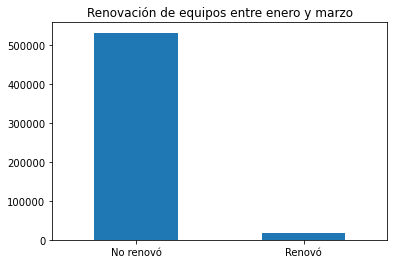

In [191]:
target['TARGET'].value_counts().plot(kind = 'bar')
plt.xticks([0, 1], labels = ['No renovó', 'Renovó'], rotation = 0)
plt.title('Renovación de equipos entre enero y marzo')
plt.plot()

In [192]:
target.rename(columns = {'PERIODO': 'NUMPERIODO'}, inplace = True)

In [193]:
dataset_final = pd.merge(dataset_final, target, on = ['NUMPERIODO', 'nro_telefono_hash'], how = 'left')

In [194]:
periodos = dataset_final['NUMPERIODO'].unique()

for periodo in periodos:
    print('Periodo {}: {}'.format(periodo, dataset_final.loc[dataset_final['NUMPERIODO'] == periodo, 'TARGET'].isnull().sum()))

Periodo 202201: 0
Periodo 202202: 0
Periodo 202203: 0
Periodo 202204: 186549


Incluiremos una columna que indique si el cliente renovó equipo el mes pasado.

In [195]:
cols = ['nro_telefono_hash', 'TARGET']
prev_target = pd.DataFrame()

for i in range (len(periodos)):

    curr_df = dataset_final.loc[dataset_final['NUMPERIODO'] == periodos[i], cols]
    
    if i == 0:
        prev_target = curr_df
        prev_target['PREV_TARGET'] = np.zeros(curr_df.shape[0])
    
    else:
        prev_df = dataset_final.loc[dataset_final['NUMPERIODO'] == periodos[i-1], cols]
        
        df_aux = pd.merge(curr_df, prev_df, on = 'nro_telefono_hash', how = 'left')
        df_aux.rename(columns = {'TARGET_x': 'TARGET', 'TARGET_y': 'PREV_TARGET'}, inplace = True)
        
        prev_target = pd.concat([prev_target, df_aux], axis = 0)

prev_target['PREV_TARGET'].fillna(0, inplace = True)
    


In [196]:
#Example
prev_target.loc[prev_target['nro_telefono_hash'] == 'e7b25076566d749f6793aedc6ff8bf1e089d7e102e1821dd589f519878158491',:]

,nro_telefono_hash,TARGET,PREV_TARGET
141939,e7b25076566d749f6793aedc6ff8bf1e089d7e102e1821...,1.0,0.0
114914,e7b25076566d749f6793aedc6ff8bf1e089d7e102e1821...,1.0,1.0
60905,e7b25076566d749f6793aedc6ff8bf1e089d7e102e1821...,1.0,1.0
133079,e7b25076566d749f6793aedc6ff8bf1e089d7e102e1821...,NaN,1.0


In [197]:
dataset_final['PREV_TARGET'] = prev_target['PREV_TARGET'].to_numpy()

In [198]:
dataset_final.head()

,NUMPERIODO,nro_documento_hash,nro_telefono_hash,FECACTIVACIONCONTRATO_INT,FECINGRESOCLIENTE_INT,tipo1,tipo2,VCHMESADENDA,VCHPENALIDAD,alto,...,trafico_app_8,trafico_app_9,trafico_total,GIRO,SUBGIRO,TIENE_PROD_1,TIENE_PROD_2,TIENE_PROD_3,TARGET,PREV_TARGET
0,202201,5f58359a37ac456d9050c75aa36720b73063bf4b77f483...,9be57e3928a78ae85be270575f97e82a6bdbd59fc87281...,1072320.0,902100.0,1,0,0.0,0.00,1.0,...,0.000000,0.0,16606.140346,3e33e191fc2f1513037662f262867a04e278e8a0589a32...,8e0b81ed56b34766254d0492d32fa9d5d08a33690db2b6...,1,0,0,0.0,0.0
1,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,119dd6dff66e259a3996de7d885e2c54e8ed5874239346...,1072680.0,781560.0,1,0,7.6,365.57,1.0,...,180.536775,0.0,3705.222886,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,0.0,0.0
2,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,73cec44593f362cccdb45773197a0bf2136978cb241c91...,1072680.0,781560.0,1,0,0.0,0.00,0.0,...,980.521564,0.0,4617.043791,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,0.0,0.0
3,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,db86e518af696d60b247466fd1bb5823cf81a9442c16b2...,1072680.0,781560.0,0,1,0.0,0.00,0.0,...,0.000000,0.0,0.000000,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,0.0,0.0
4,202201,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,90d5ab1ad28da36b0fa821759b0a9df2b248dc92a557a5...,1072680.0,781560.0,1,0,0.0,0.00,1.0,...,37.027894,0.0,450.053533,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,0.0,0.0


In [199]:
dataset_final.loc[dataset_final['TARGET'] == 1, 'PREV_TARGET'].value_counts()

0.0    11182
1.0     5290
Name: PREV_TARGET, dtype: int64

[]

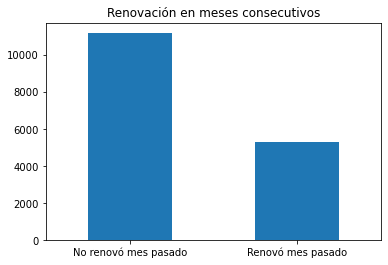

In [200]:
dataset_final.loc[dataset_final['TARGET'] == 1, 'PREV_TARGET'].value_counts().plot(kind = 'bar')
plt.xticks([0, 1], labels = ['No renovó mes pasado', 'Renovó mes pasado'], rotation = 0)
plt.title('Renovación en meses consecutivos')
plt.plot()

Ahora que ya hemos procesado todas las bases de datos por separado y hemos combinado los registros en un dataset general, dividiremos el dicho dataset en el dataset de entrenamiento (registros de enero, febrero y marzo) y el de prueba (registros de abril), y finalmente guardaremos ambos como un archivos csv que serán los que se utilicen en la elaboración de los modelos predictivos.

In [201]:
dataset_train = dataset_final[dataset_final['NUMPERIODO'] < 202204]
dataset_test = dataset_final[dataset_final['NUMPERIODO'] == 202204]

In [203]:
dataset_train.to_csv('Dataset train.csv', index = False)
dataset_test.to_csv('Dataset test.csv', index = False)